# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time 
import datetime
from scipy.stats import linregress

weather_api_key = "c530a924f2c593218675c061f3dc6c75"


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [82]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
lat_lngs_list = list(lat_lngs)
#len(cities)
print(len(cities))

612


In [68]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    #city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|puerto ayacucho
Processing record 2|launceston
Processing record 3|hilo
Processing record 4|merrill
Processing record 5|mataura
Processing record 6|saint-philippe
City not found. skipping.
Processing record 7|vao
Processing record 8|georgetown
Processing record 9|mahebourg
Processing record 10|ushuaia
Processing record 11|kodiak
Processing record 12|tuktoyaktuk
Processing record 13|chuy
Processing record 14|muroto
Processing record 15|biak
Processing record 16|rikitea
Processing record 17|warri
Processing record 18|busselton
Processing record 19|punta arenas
Processing record 20|vaini
Processing record 21|okato
Processing record 22|khatanga
Processing record 23|port alfred
Processing record 24|marzuq
Processing record 25|staraya poltavka
Processing record 26|cape town
Processing record 27|likhoslavl
Processing record 28|bereda
Processing record 29|lagoa
Processing record 30|bredasdorp
Processing record 31|palmares do sul
Processing record 32|bluff
Processing record 

Processing record 247|bilibino
Processing record 248|kanel
Processing record 249|kaeo
Processing record 250|lavrentiya
Processing record 251|alofi
Processing record 252|grindavik
Processing record 253|baker city
Processing record 254|urengoy
Processing record 255|san rafael
Processing record 256|yelan
Processing record 257|loralai
Processing record 258|northam
Processing record 259|flinders
Processing record 260|moron
Processing record 261|saskylakh
Processing record 262|gonbad-e qabus
Processing record 263|mount gambier
Processing record 264|pucallpa
Processing record 265|litovko
Processing record 266|ahipara
Processing record 267|touba
Processing record 268|vitorino freire
Processing record 269|hofn
Processing record 270|fomboni
Processing record 271|khash
Processing record 272|nikolskoye
Processing record 273|los llanos de aridane
Processing record 274|praia da vitoria
Processing record 275|mangochi
Processing record 276|jalu
City not found. skipping.
Processing record 277|shambu
Ci

Processing record 496|yatou
Processing record 497|vostok
Processing record 498|hobyo
Processing record 499|gat
Processing record 500|san luis
Processing record 501|arecibo
Processing record 502|meybod
Processing record 503|mugur-aksy
Processing record 504|douglas
Processing record 505|mehamn
Processing record 506|ambilobe
Processing record 507|torit
Processing record 508|bodden town
Processing record 509|talnakh
Processing record 510|salinas
Processing record 511|tezu
Processing record 512|lavumisa
Processing record 513|darhan
Processing record 514|tuatapere
Processing record 515|eloy
Processing record 516|narsingi
Processing record 517|bongandanga
Processing record 518|ulaangom
Processing record 519|sabang
Processing record 520|venado tuerto
Processing record 521|marawi
City not found. skipping.
Processing record 522|collie
Processing record 523|port macquarie
Processing record 524|shache
Processing record 525|olinda
Processing record 526|imeni babushkina
Processing record 527|timra
P

In [73]:
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Puerto Ayacucho,86,VE,1614652446,51,5.6639,-67.6236,76.51,5.97
1,Launceston,75,AU,1614652374,36,-41.4500,147.1667,60.80,14.97
2,Hilo,90,US,1614652432,68,19.7297,-155.0900,73.40,9.22
3,Merrill,1,US,1614652447,52,45.1805,-89.6835,15.80,3.44
4,Mataura,96,NZ,1614652447,66,-46.1927,168.8643,69.89,0.72
...,...,...,...,...,...,...,...,...,...
561,Vangaindrano,99,MG,1614652530,88,-23.3500,47.6000,74.48,1.25
562,Inuvik,98,CA,1614652530,76,68.3499,-133.7218,-23.80,5.75
563,Havelock,90,US,1614652530,51,34.8791,-76.9013,60.80,18.41


In [76]:
#Creating city dataframe
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("..\output_data\city.csv")

#Displaying dataframe
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Puerto Ayacucho,86,VE,1614652446,51,5.6639,-67.6236,76.51,5.97
1,Launceston,75,AU,1614652374,36,-41.4500,147.1667,60.80,14.97
2,Hilo,90,US,1614652432,68,19.7297,-155.0900,73.40,9.22
3,Merrill,1,US,1614652447,52,45.1805,-89.6835,15.80,3.44
4,Mataura,96,NZ,1614652447,66,-46.1927,168.8643,69.89,0.72


In [77]:
city_df.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

In [84]:
#Converting Date for title of plot
timestamp = city_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

#Creating plot
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature({shortened_timestamp})")
plt.savefig("..\output_data\city.csv")
plt.show()

AttributeError: module 'datetime' has no attribute 'utcfromtimestamp'

NameError: name 'shortened_timestamp' is not defined

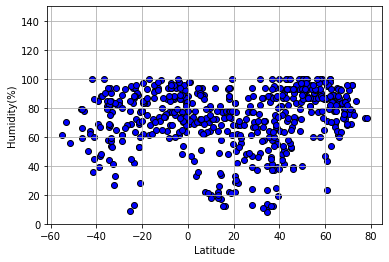

In [85]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ({shortened_timestamp})")
plt.savefig("../output_files/Lat_vs_humidity_plot")
plt.show()

NameError: name 'shortened_timestamp' is not defined

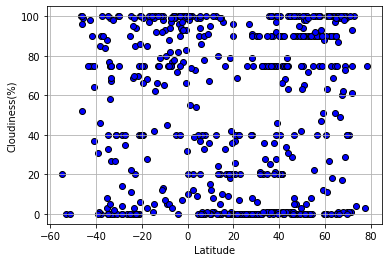

In [86]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({shortened_timestamp})")
plt.savefig("../output_files/Lat_vs_cloudiness_plot")
plt.show()

NameError: name 'shortened_timestamp' is not defined

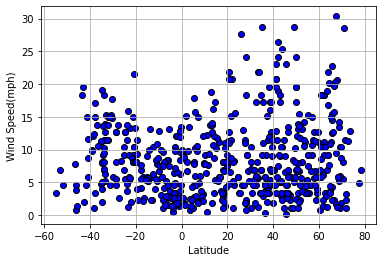

In [87]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed ({shortened_timestamp})")
plt.savefig("../output_files/Lat_vs_windSpeed_plot")
plt.show()

In [88]:
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [89]:
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]

The r-squared is: -0.8616604675573127


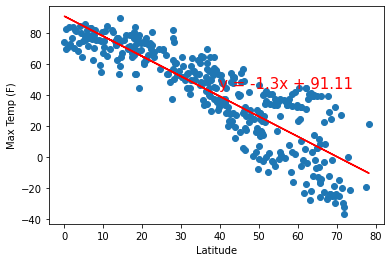

None


In [90]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))


The r-squared is: 0.4845471259696505


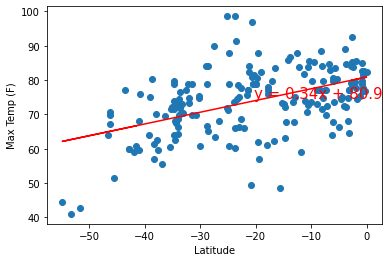

None


In [91]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.32788491072228854


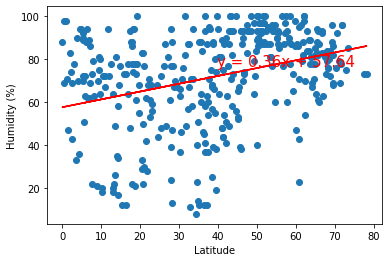

None


In [92]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.2631108085406137


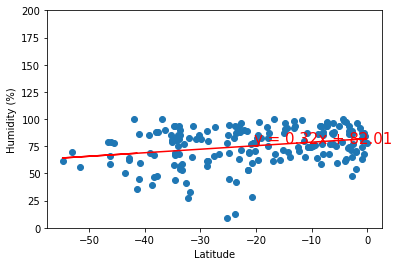

None


In [93]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.2659189727200818


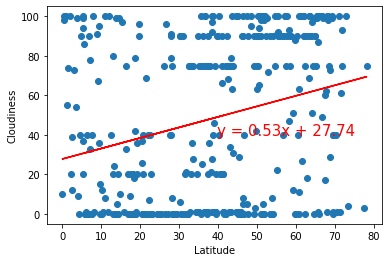

None


In [94]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.305322986854614


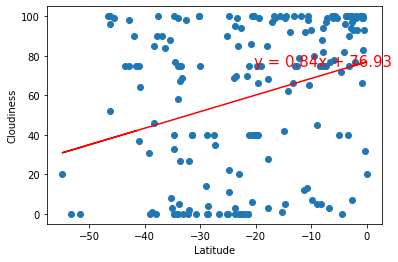

None


In [95]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.11412450658567358


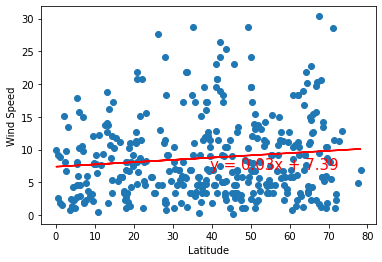

None


In [96]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.29327160009750836


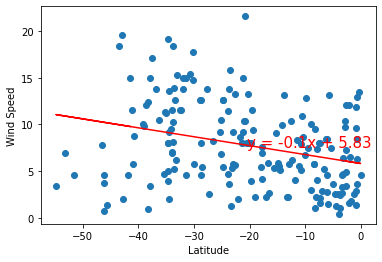

None


In [97]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))